In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [5]:
plt.close("all")
cancer = load_breast_cancer()
rng = np.random.default_rng(seed=42)

# noiseを作る
noise = rng.normal(size=(len(cancer.data), 50))

# noiseを付け足す
# hstackは新しい列を作る, pd.concat(axis=1)と同じ
X_w_noise = np.hstack([cancer["data"], noise])


X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer["target"], random_state=0, test_size=0.5)


Text(0.5, 0, 'Sample index')

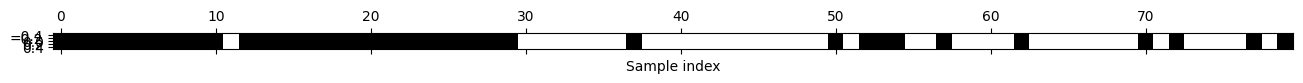

In [8]:
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)  # このn_features_to_selectが最終的に欲しい特徴量の数

select.fit(X_train, y_train)

mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap="gray_r")
plt.xlabel("Sample index")


In [14]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression(max_iter=4000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
score

0.9403508771929825

In [15]:
select.score(X_test, y_test)

0.9473684210526315